In [1]:
from data_loader import load_classifier_data
from classifier_models import CNN_Classifier
from classifier_models import UNET_Classifier
import torch

DEVICE = "cpu"

ALLOW_CUDA = True
ALLOW_MPS = False # Metal API for MacOS

if torch.cuda.is_available() and ALLOW_CUDA:
    DEVICE = "cuda"
elif (torch.has_mps or torch.backends.mps.is_available()) and ALLOW_MPS:
    DEVICE = "mps"
print(f"Using device {DEVICE}")

# load dataset
(trainX, trainy), (testX, testy) = load_classifier_data(DEVICE)

model = UNET_Classifier().to(DEVICE)
model.load_state_dict(torch.load("../data/state_dict_model.pt"), strict=True)
model.eval()

print(model)


Using device cuda


FileNotFoundError: [Errno 2] No such file or directory: '../data/state_dictmodel.pt'

c:\Users\Andrey\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Accuracy: 97.10%
Accuracy 0: 100 / 103 = 97.09%
Accuracy 1: 118 / 119 = 99.16%
Accuracy 2: 95 / 99 = 95.96%
Accuracy 3: 86 / 89 = 96.63%
Accuracy 4: 101 / 106 = 95.28%
Accuracy 5: 89 / 93 = 95.70%
Accuracy 6: 101 / 104 = 97.12%
Accuracy 7: 87 / 91 = 95.60%
Accuracy 8: 92 / 92 = 100.00%
Accuracy 9: 102 / 104 = 98.08%
Predicted: 0, target: 0 True
Predicted: 9, target: 4 False
Predicted: 1, target: 1 True
Predicted: 0, target: 0 True
Predicted: 5, target: 5 True
Predicted: 2, target: 2 True
Predicted: 6, target: 6 True
Predicted: 9, target: 9 True
Predicted: 1, target: 1 True


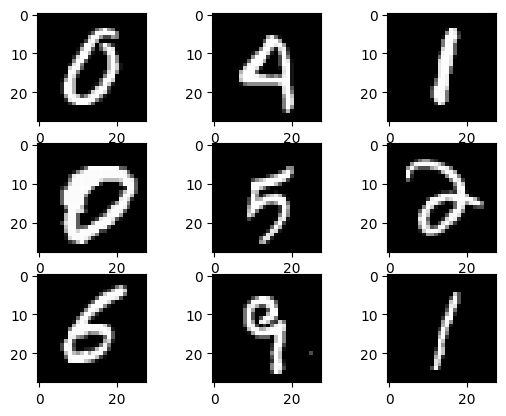

In [ ]:
from matplotlib import pyplot as plt
import torchmetrics
import numpy as np

model.eval()

# demo batch
demo_batch_size = 1000
ri = np.random.permutation(testX.shape[0])[:demo_batch_size]
inputs, targets = testX[ri], testy[ri]

predictions = model(inputs)

# get accuracy
label_predictions = torch.argmax(predictions, dim=1)
accuracy = torchmetrics.Accuracy(task='multiclass', num_classes=10).to(DEVICE)
acc = accuracy(predictions, targets)
print(f"Accuracy: {acc * 100:.2f}%")

# get per-digit accuracy
correct = np.zeros(10)
total = np.zeros(10)
for i in range(demo_batch_size):
    #print(f"Predicted: {label_predictions[i]}, target: {targets[i]} {label_predictions[i] == targets[i]}")
    total[targets[i]] += 1
    correct[targets[i]] += (label_predictions[i] == targets[i])

digit_acc = correct / total * 100
for i in range(10):
    print(f"Accuracy {i}: {correct[i]:.0f} / {total[i]:.0f} = {digit_acc[i]:.2f}%")

# plot up to 9 images
for i in range(min(demo_batch_size, 9)):
    print(f"Predicted: {label_predictions[i]}, target: {targets[i]} {label_predictions[i] == targets[i]}")
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(inputs[i].squeeze().cpu(), cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

Input: torch.Size([1, 1, 28, 28])
Pred: torch.Size([1, 10])
Label: tensor([5], device='cuda:0')
Label[0]: 5


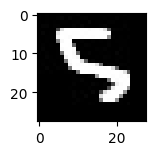

In [ ]:
from data_loader import load_classifier_image

input_image_tensor = load_classifier_image("../data/digit.jpg", DEVICE)

pred = model(input_image_tensor)
label_pred = torch.argmax(pred, dim=1)

print(f"Input: {input_image_tensor.shape}")
print(f"Pred: {pred.shape}")
print(f"Label: {label_pred}")
print(f"Label[0]: {label_pred[0]}")

# define subplot
plt.subplot(330 + 1)
# plot raw pixel data
plt.imshow(input_image_tensor.squeeze().cpu(), cmap=plt.get_cmap('gray'))